In [1]:
from quadrics import *
import scipy.stats as ss
import matplotlib.pyplot as plt

In [2]:
def graph_from_file(file, limit=0):
    word_id = dict()
    edges = []
    s = file.readline()
    i = 0
    while s:
        w1, w2, weight = s.split(',')
        weight = float(weight)
        if w1 not in word_id:
            word_id[w1] = len(word_id)
        if w2 not in word_id:
            word_id[w2] = len(word_id)
        id1 = word_id[w1]
        id2 = word_id[w2]
        edges.append([id1, id2, weight])
        s = file.readline()
        i += 1
        if i == limit:
            break
    return Graph(len(word_id), len(edges), edges), word_id

In [3]:
%%time
rus_file = open('assoc_net.txt', encoding='utf-8')
rus_graph, rus_dict = graph_from_file(rus_file)

Wall time: 3.3 s


In [4]:
eng_file = open('assoc_eng2.txt')
eng_graph, eng_dict = graph_from_file(eng_file)

In [5]:
eng_graph.V, eng_graph.E

(5019, 63629)

In [6]:
rus_graph.V, rus_graph.E

(57108, 645056)

In [7]:
rg1 = rand_graph(eng_graph.V, eng_graph.E)

In [8]:
rg2 = rand_graph(rus_graph.V, rus_graph.E)

In [9]:
print(rg1.V, rg1.E)
print(rg2.V, rg2.E)

5019 63629
57108 645056


In [9]:
%%time
a = Graph.laplace_matrix(rg2)

CPU times: user 10.3 s, sys: 7.37 s, total: 17.6 s
Wall time: 17.6 s


In [0]:
%%time
#a = eigenvalues(a)

In [12]:
%%time
b = eig_fast(a)

CPU times: user 17min 5s, sys: 1min 11s, total: 18min 17s
Wall time: 13min 50s


In [0]:
a.sort()
len(a)

5019

In [9]:
def wasserstein_distance1(a, b):
    Len = min(len(a), len(b))
    return ss.wasserstein_distance(a[:Len], b[:Len])

def wasserstein_distance2(a, b):
    if len(a) > len(b):
        a, b = b, a
    return ss.wasserstein_distance(a + [0] * (len(b) - len(a)), b)

def save(vector, string):
    f = open(string, 'w')
    print(vector, file=f)
    f.close()

In [10]:
def compare(func, threshold):
    M1 = func(eng_graph, min_weight=threshold)
    M2 = func(rus_graph, min_weight=threshold)
    e1 = eigenvalues(M1)
    save(e1, str(func) + '_eng_' + str(threshold))
    e2 = eig_fast(M2)
    save(e2, str(func) + '_rus_' + str(threshold))
    rm1 = func(rg1, min_weight=threshold)
    rm2 = func(rg2, min_weight=threshold)
    e3 = eigenvalues(rm1)
    e4 = eig_fast(rm2)
    save(e3, str(func) + '_rand1_' + str(threshold))
    save(e4, str(func) + '_rand2_' + str(threshold))
    print('Distance between russian and english', wasserstein_distance1(e1, e2))
    print('Distance between random1 and english', wasserstein_distance1(e1, e3))
    print('Distance between random2 and english', wasserstein_distance1(e1, e4))
    print('Distance between russian and random1', wasserstein_distance1(e2, e3))
    print('Distance between russian and random2', wasserstein_distance1(e2, e4))
    print('Distance between russian and english', wasserstein_distance2(e1, e2))
    print('Distance between random1 and english', wasserstein_distance2(e1, e3))
    print('Distance between random2 and english', wasserstein_distance2(e1, e4))
    print('Distance between russian and random1', wasserstein_distance2(e2, e3))
    #print('Distance between russian and random2', wasserstein_distance2(e2, e4))

In [11]:
compare(Graph.laplace_matrix, 0.6)

/usr/local/lib/python3.5/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Distance between russian and english 0.18728830452624692
Distance between random1 and english 9.947001387610285
Distance between random2 and english 3.883861025780125
Distance between russian and random1 10.134289692136532
Distance between russian and random2 8.015374378370764


In [11]:
compare(Graph.laplace_matrix, 0.4)

/usr/local/lib/python3.5/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Distance between russian and english 0.5586770280949225
Distance between random1 and english 14.688184891223406
Distance between random2 and english 6.7984958077497195
Distance between russian and random1 15.246861919318329
Distance between russian and random2 11.990053932898995
Distance between russian and english 2.7161518525598423
Distance between random1 and english 14.688184891223406
Distance between random2 and english 13.508895598812495
Distance between russian and random1 1.4638194474776112


ValueError: operands could not be broadcast together with shapes (57108,) (0,) 

In [12]:
compare(Graph.laplace_matrix, 0.85)

Distance between russian and english 0.009165172345088735
Distance between random1 and english 3.727435744200351
Distance between random2 and english 0.6156604901374776
Distance between russian and random1 3.7366009165454392
Distance between russian and random2 3.0089654689360437
Distance between russian and english 0.6583666036282053
Distance between random1 and english 3.727435744200351
Distance between random2 and english 3.3939903341038025
Distance between russian and random1 0.34283093293860406


ValueError: operands could not be broadcast together with shapes (57108,) (0,) 

In [ ]:
compare(Graph.adjacency_matrix, 0.4)

In [ ]:
compare(Graph.adjacency_matrix, 0.6)

In [ ]:
compare(Graph.adjacency_matrix, 0.85)

Здесь попробуем сравнивать английский граф с случайными графами с хорошо подобранными распределениями.

In [10]:
rg_normal = rand_graph(eng_graph.V, eng_graph.E)
rg_normal_matr = rg_normal.laplace_matrix(min_weight=0.4)
eng_matr = eng_graph.laplace_matrix(min_weight=0.4)
e_rg_normal = eigenvalues(rg_normal_matr)
e_eng_matr = eigenvalues(eng_matr)
print(ss.wasserstein_distance(e_rg_normal, e_eng_matr))

14.64355449687855


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [11]:
rg_exp = rand_graph(eng_graph.V, eng_graph.E, lambda: np.random.exponential(0.15, 1)[0])
rg_exp_matr = rg_exp.laplace_matrix(min_weight=0.4)
e_rg_exp = eigenvalues(rg_exp_matr)
print(ss.wasserstein_distance(e_rg_exp, e_eng_matr))

1.2012630221466416


In [12]:
rg_gamma = rand_graph(eng_graph.V, eng_graph.E, lambda: np.random.gamma(0.25, 0.7, 1)[0])
rg_gamma_matr = rg_gamma.laplace_matrix(min_weight=0.4)
e_rg_gamma = eigenvalues(rg_gamma_matr)
print(ss.wasserstein_distance(e_rg_gamma, e_eng_matr))

2.9075962759407425


In [13]:
f = open('assoc_net.txt', encoding='utf-8').readlines()
nums = []
for line in f:
    line = line.split(',')
    nums.append(float(line[-1]))

In [14]:
rg_mock = rand_graph(eng_graph.V, eng_graph.E, lambda: nums[randint(0, len(nums) - 1)])
rg_mock_matr = rg_mock.laplace_matrix(min_weight=0.4)
e_mock_exp = eigenvalues(rg_mock_matr)
print(ss.wasserstein_distance(e_mock_exp, e_eng_matr))

2.503519340065531


In [15]:
f = open('assoc_eng2.txt', encoding='utf-8').readlines()
nums = []
for line in f:
    line = line.split(',')
    nums.append(float(line[-1]))

In [16]:
rg_mock = rand_graph(eng_graph.V, eng_graph.E, lambda: nums[randint(0, len(nums) - 1)])
rg_mock_matr = rg_mock.laplace_matrix(min_weight=0.4)
e_mock_exp = eigenvalues(rg_mock_matr)
print(ss.wasserstein_distance(e_mock_exp, e_eng_matr))

0.16008592783383493


In [25]:
weights = [edge[2] for edge in rg_mock.edges]

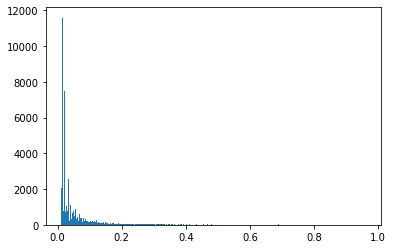

In [26]:
plt.hist(weights, bins=500)
plt.show()

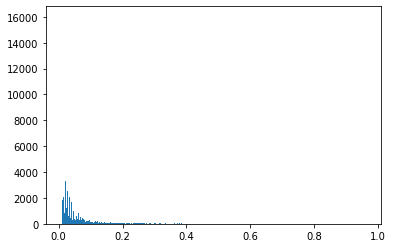

In [24]:
weights = [edge[2] for edge in eng_graph.edges]
plt.hist(weights, bins=500)
plt.show()

In [10]:
rg_lognorm = rand_graph(eng_graph.V, eng_graph.E, lambda: np.random.lognormal(-2.0, 0.7, 1)[0])
rg_lognorm_matr = rg_lognorm.laplace_matrix(min_weight=0.4)
e_rg_lognorm = eigenvalues(rg_lognorm_matr)

NameError: name 'e_eng_matr' is not defined

In [12]:
eng_matr = eng_graph.laplace_matrix(min_weight=0.4)
e_eng_matr = eigenvalues(eng_matr)

In [13]:
print(ss.wasserstein_distance(e_rg_lognorm, e_eng_matr))

0.961346969266049


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [14]:
f = open('assoc_net.txt', encoding='utf-8').readlines()
nums = []
for line in f:
    line = line.split(',')
    nums.append(float(line[-1]))

In [15]:
rg_mock = rand_graph(eng_graph.V, eng_graph.E, lambda: nums[randint(0, len(nums) - 1)])
rg_mock_matr = rg_mock.laplace_matrix(min_weight=0.4)
e_mock_exp = eigenvalues(rg_mock_matr)
print(ss.wasserstein_distance(e_mock_exp, e_eng_matr))

2.5029342823022986
